<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/task_7_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [76]:
ad_data = pd.read_csv('/content/drive/MyDrive/SHAI/advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

(0.0, 90.0)

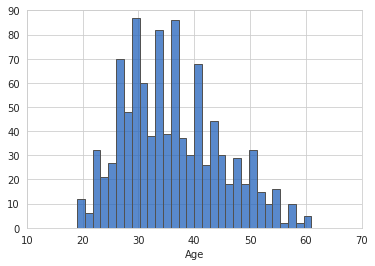

In [6]:
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
sns.histplot(x='Age', data=ad_data, bins=30, color='#2262BB', edgecolor='#525252')
plt.xlabel('Age')
plt.ylabel('')
plt.xlim(10,70)
plt.ylim(0,90)

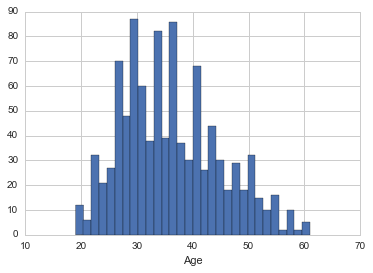

**Create a jointplot showing Area Income versus Age.**

(10000.0, 90000.0)

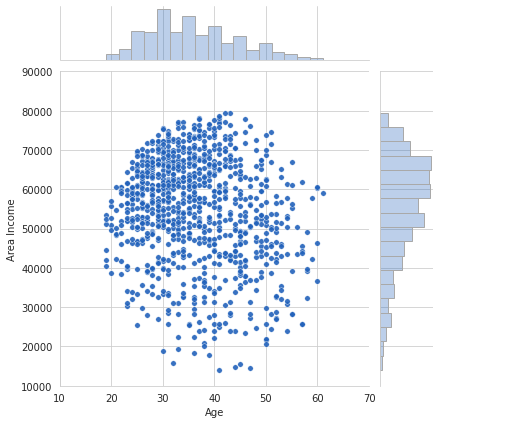

In [7]:
g = sns.JointGrid(data=ad_data, x='Age', y='Area Income') 
plt.annotate('pearsonr = -0.18; p=6e-09', (0,300))
g.plot_joint(sns.scatterplot, color='#2262BB', s=30, alpha=0.9)
g.plot_marginals(sns.histplot, color='#2262BB', alpha=0.3, edgecolor='darkgray')

g.ax_joint.set_xlim(10,70)
g.ax_joint.set_ylim(10000,90000)


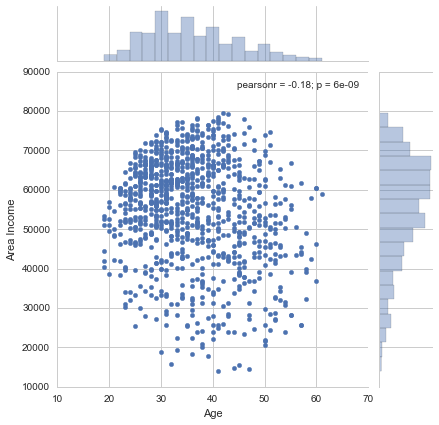

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

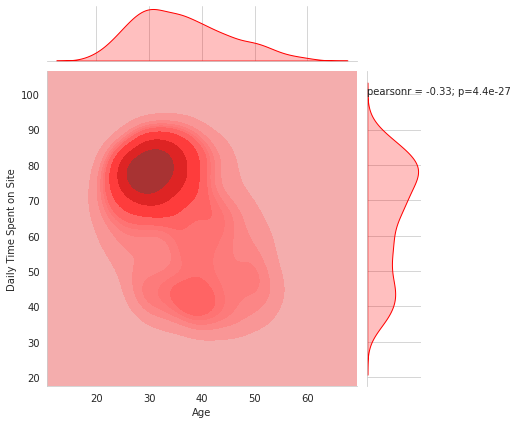

In [47]:
# sns.jointplot(x='Age', y='Daily Time Spent on Site',data=ad_data, kind="kde", color='r', shade=True)
g = sns.JointGrid(data=ad_data, x='Age', y='Daily Time Spent on Site') 
plt.annotate('pearsonr = -0.33; p=4.4e-27', (0,100))
g.plot_joint(sns.kdeplot, color='red', fill=True, thresh=0)
g.plot_marginals(sns.kdeplot, color='red',shade=True)
# Please share with me in the comments the correct color and how to add the annotation without using seaborn 0.9.0

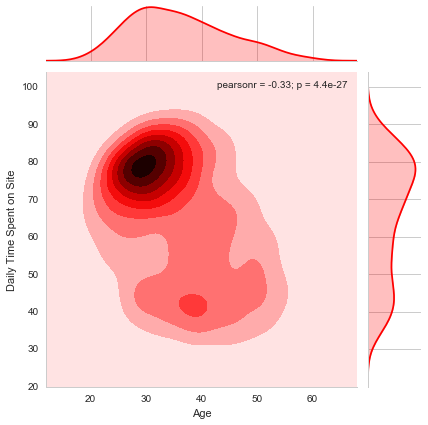

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

(50.0, 300.0)

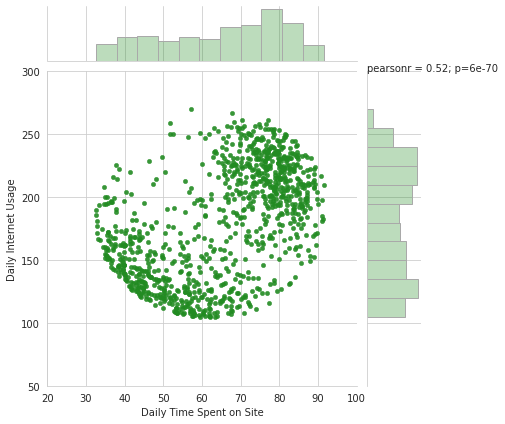

In [9]:
g = sns.JointGrid(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage') 
plt.annotate('pearsonr = 0.52; p=6e-70', (0,300))
g.plot_joint(sns.scatterplot, color='forestgreen', s=20, alpha=0.9, edgecolor='forestgreen')
g.plot_marginals(sns.histplot, color='forestgreen', alpha=0.3, edgecolor='darkgray')

g.ax_joint.set_xlim(20,100)
g.ax_joint.set_ylim(50,300)

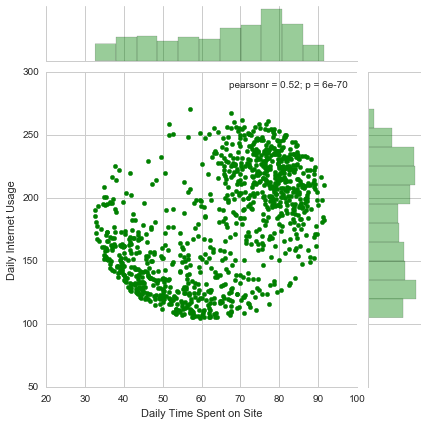

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

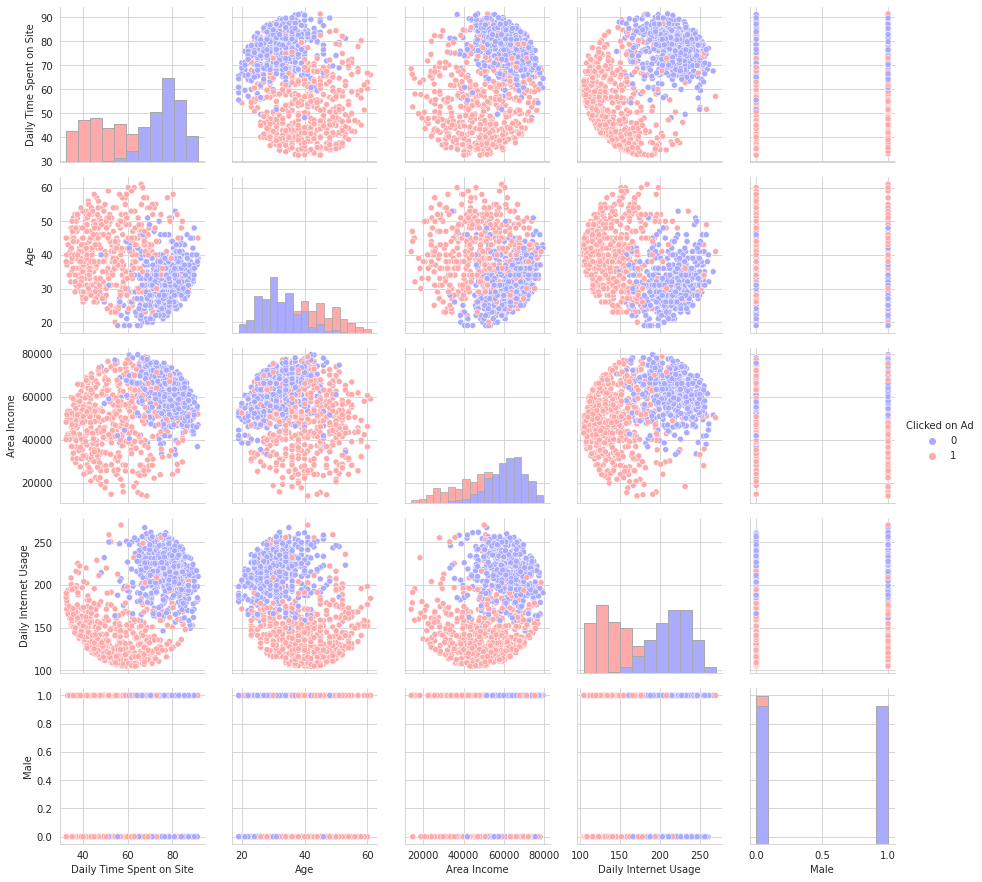

In [55]:
g = sns.PairGrid(ad_data, hue='Clicked on Ad', palette='bwr')
g.map_diag(sns.histplot, alpha=1, edgecolor='darkgray')
g.map_offdiag(sns.scatterplot)
g.add_legend()
# Clicked on Ad is removed because it is already in hue

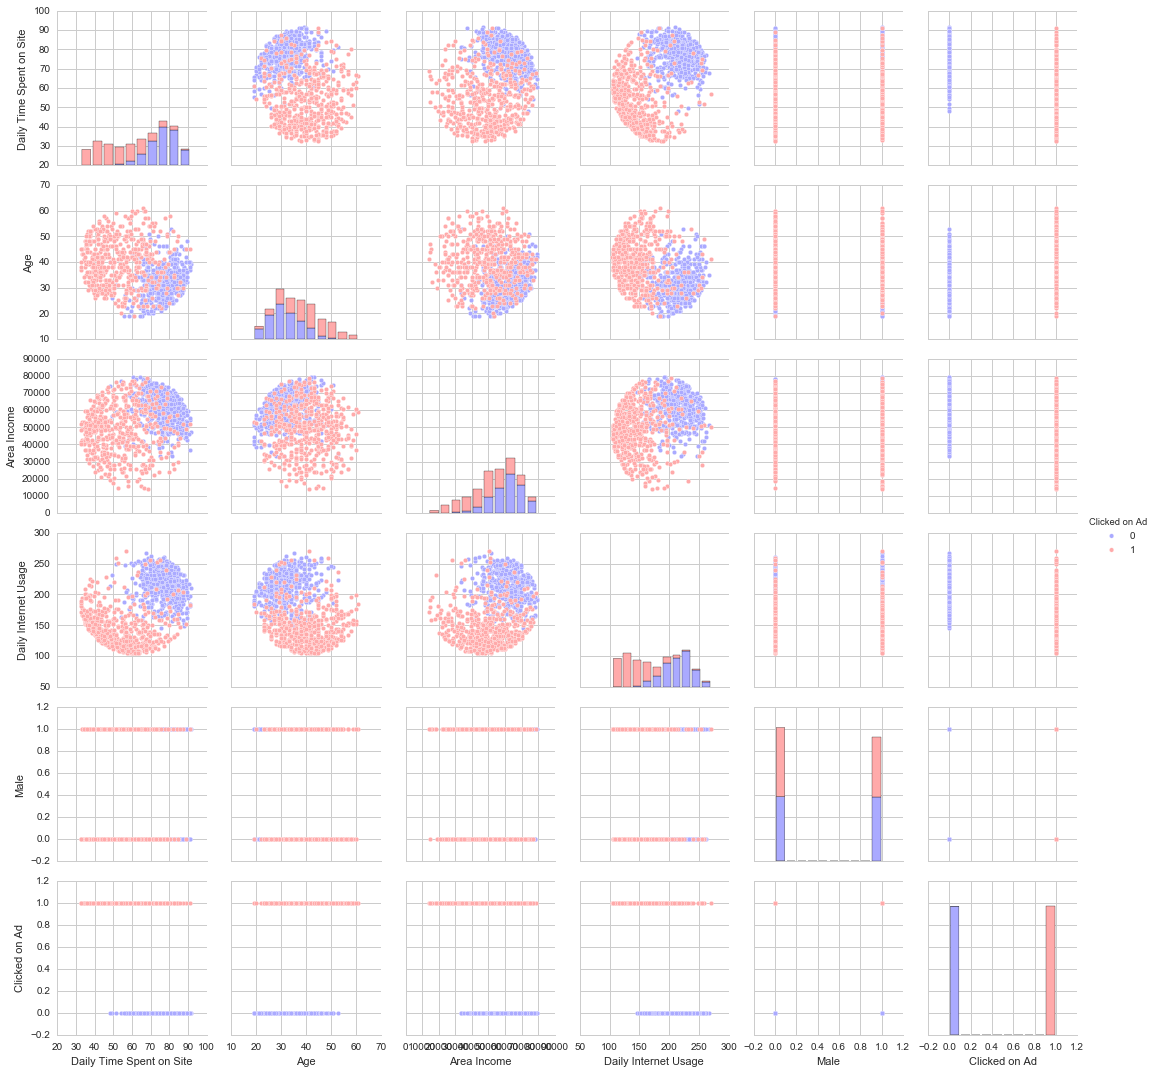

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [56]:
from sklearn.model_selection import train_test_split

In [84]:
# Dropping ad name
ad_data.drop(columns=['Ad Topic Line','Timestamp'], inplace=True)

In [78]:
city = pd.get_dummies(ad_data['City'])
country = pd.get_dummies(ad_data['Country'])
ad_data.drop(columns=['City','Country'],inplace=True)

In [82]:
ad_data = pd.concat([ad_data,country,city],axis=1)

In [86]:
X = ad_data.drop(columns=['Clicked on Ad'])
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

feature scaling

In [ ]:
# Done before splitting

** Train and fit a logistic regression model on the training set.**

In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [112]:
# grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [113]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [114]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969000 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967000 (0.012083) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.892000 (0.026000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892000 (0.026000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.969000 (0.009165) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.896000 (0.021307) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892000 (0.026000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.969000 (0.011136) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.901000 (0.029563) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892000 (0.026000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.966000 (0.012000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.894000 (0.028705) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.892000 (0.026000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.966000 (0.012000) with

In [115]:
# Retraining the model with best parameters
gridmodel = LogisticRegression(C=10, penalty='l2', random_state=None, solver='newton-cg')
gridmodel.fit(X_train,y_train)
gridpreds = gridmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [116]:
# Result after grid search
from sklearn.metrics import classification_report
print(classification_report(y_test,gridpreds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## Predictions and Evaluations
** Now predict values for the testing data.**

In [117]:
predictions = logmodel.predict(X_test)

** Create a Confusion Matrix for the model.**

In [118]:
# Result of prediction without grid search
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        89
           1       0.97      0.85      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



## k-Nearest Neighbors

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn = KNeighborsClassifier(n_neighbors=1)

In [121]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [122]:
predictions = knn.predict(X_test)

In [123]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        89
           1       0.81      0.77      0.79       111

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



##random forest classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
forest = RandomForestClassifier()

In [126]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
predictions = forest.predict(X_test)

In [128]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



## Great Job!